###
survival        目标列，是否存活，1代表存活 (0 = No; 1 = Yes)
pclass          乘坐的舱位级别 (1 = 1st; 2 = 2nd; 3 = 3rd)
name            姓名
sex             性别
age             年龄
sibsp           兄弟姐妹的数量（乘客中）
parch           父母的数量（乘客中）
ticket          票号
fare            票价
cabin           客舱
embarked        登船的港口
                (C = Cherbourg; Q = Queenstown; S = Southampton)

In [61]:
%matplotlib inline

import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [86]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring.find(big_string, substring) != -1:
            return substring
    return np.nan
def replace_titles(x):
    title=x['Title']
    if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Master']:
        return 'Master'
    elif title in ['Countess', 'Mme','Mrs']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms','Miss']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    elif title =='':
        if x['Sex']=='Male':
            return 'Master'
        else:
            return 'Miss'
    else:
        return title
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']

In [87]:
label = train['Survived'] # 目标列

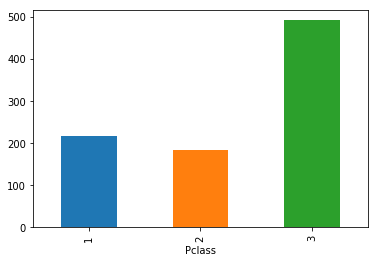

In [88]:
# 接下来我们对每个特征进行一下分析：
x = train.groupby(['Pclass'])
pd.DataFrame(x.mean())
#pd.DataFrame(train)
train.groupby(['Pclass'])['PassengerId'].count().plot(kind='bar')

###没有数据的地方不计数

In [89]:
train.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


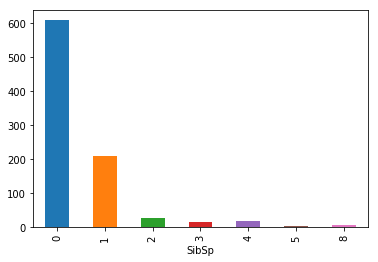

In [90]:
train.groupby(['SibSp'])['PassengerId'].count().plot(kind='bar')

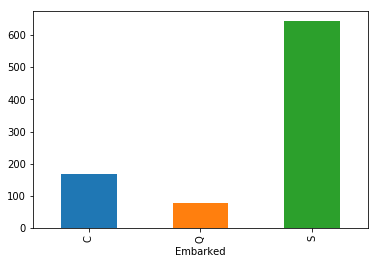

In [91]:
train.groupby(['Embarked'])['PassengerId'].count().plot(kind='bar')

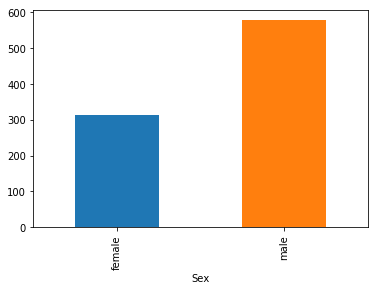

In [92]:
train.groupby(['Sex'])['PassengerId'].count().plot(kind='bar')

In [93]:
print('检测是否有缺失值：')
print(train[train['Age'].isnull()]['Age'].head())

检测是否有缺失值：
5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
Name: Age, dtype: float64


In [94]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [95]:
# 处理Title特征
train['Title'] = train['Name'].map(lambda x: substrings_in_string(x, title_list))
test['Title'] = test['Name'].map(lambda x: substrings_in_string(x, title_list))
train['Title'] = train.apply(replace_titles, axis=1)
test['Title'] = test.apply(replace_titles, axis=1)
# family特征
train['Family_Size'] = train['SibSp'] + train['Parch']
train['Family'] = train['SibSp'] * train['Parch']
test['Family_Size'] = test['SibSp'] + test['Parch']
test['Family'] = test['SibSp'] * test['Parch']

TypeError: slice indices must be integers or None or have an __index__ method

In [97]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil